The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Input sequence (x):
tensor([ 6,  7,  2,  8,  3,  8,  2, 10, 11, 12,  6,  7,  2, 11, 12,  8,  3,  8])
Shape: torch.Size([18])

Label sequence (y):
tensor([-1, -1, -1, -1, -1, -1, -1,  6,  7,  2,  7,  2,  8,  3,  8,  3,  8,  2])
Shape: torch.Size([18])

Position encoding (x_pos):
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,  8,  9, 10, 11, 12, 11, 12, 13])
Shape: torch.Size([18])



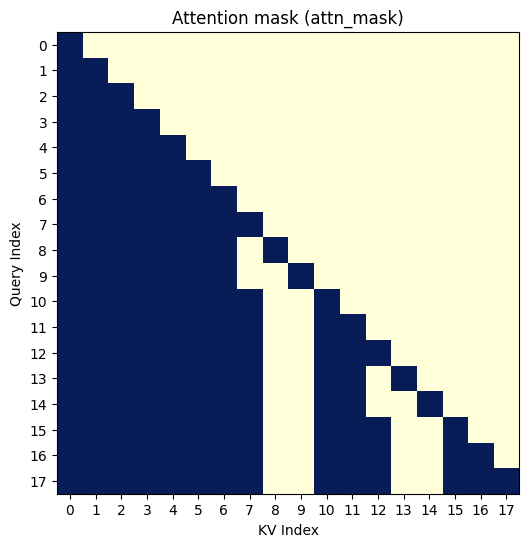

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import matplotlib.pyplot as plt


from parallel_copy import ParallelCopyDataset


np.set_printoptions(linewidth=100)
torch.set_printoptions(linewidth=100)

dataset = ParallelCopyDataset(split='train', length=7, num_digits=10, extra_threads=2, thread_mask_type='independent')
(x, x_pos, attn_mask), y = dataset[0]

# Function to format tensor output
def format_tensor(tensor, name):
    return f"{name}:\n{tensor}\nShape: {tensor.shape}\n"

def plot_attention_mask(matrix, title="Attention Mask"):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap="YlGnBu")
    # Set ticks for each x and y index
    plt.xticks(np.arange(matrix.shape[1]))
    plt.yticks(np.arange(matrix.shape[0]))

    # Set title and labels
    plt.title(title)
    plt.ylabel("Query Index")
    plt.xlabel("KV Index")

    # Show the plot
    plt.show()

# Print formatted outputs
print(format_tensor(x, "Input sequence (x)"))
print(format_tensor(y, "Label sequence (y)"))
print(format_tensor(x_pos, "Position encoding (x_pos)"))
plot_attention_mask(attn_mask, "Attention mask (attn_mask)")



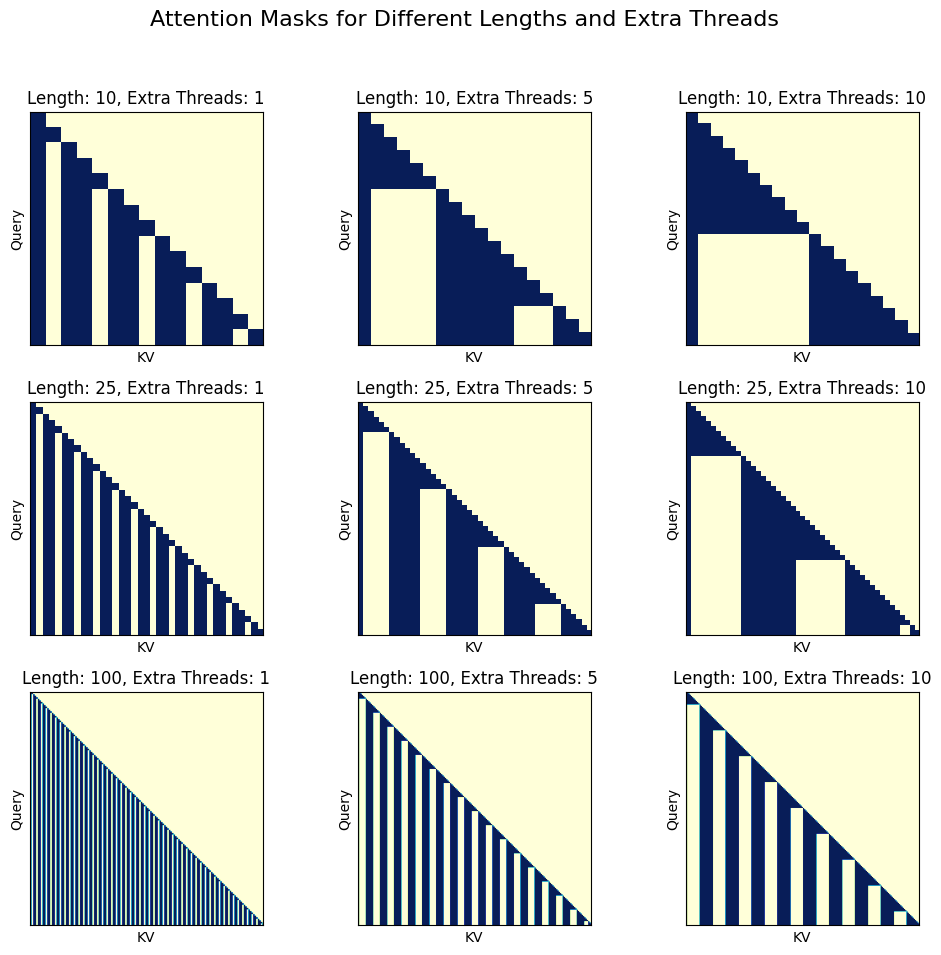

In [4]:
# Define ranges for length and extra_threads
lengths = [10, 25, 100]
extra_threads_range = [1, 5, 10]

# Create a figure with subplots
fig, axes = plt.subplots(len(lengths), len(extra_threads_range), figsize=(10, 10))
fig.suptitle("Attention Masks for Different Lengths and Extra Threads", fontsize=16)

# Iterate over lengths and extra_threads
for i, length in enumerate(lengths):
    for j, extra_threads in enumerate(extra_threads_range):
        # Create dataset
        dataset = ParallelCopyDataset(
            split='train', length=length, num_digits=10, 
            extra_threads=extra_threads, thread_mask_type='causal'
        )
        
        # Get attention mask
        (_, _, attn_mask), _ = dataset[0]
        attn_mask = attn_mask[length:, length:]
        
        # Plot attention mask
        im = axes[i, j].imshow(attn_mask, cmap="YlGnBu")
        axes[i, j].set_title(f"Length: {length}, Extra Threads: {extra_threads}")
        axes[i, j].set_xlabel("KV")
        axes[i, j].set_ylabel("Query")
        
        # Remove tick labels to avoid clutter
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

# Adjust layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
